# Plant Disease Prediction

In [1]:
!pip install mathplotlib

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement mathplotlib (from versions: none)
ERROR: No matching distribution found for mathplotlib


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

In [2]:
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
  print("GPU is available!")
else:
  print("GPU is not available.")

GPU is available!


### Training Image preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'Plant Disease dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'Plant Disease dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

### Building Convolution Layer

In [24]:
import tensorflow as tf

# Define LeNet-5 model
lenet5 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(38, activation='softmax')  # Assuming you have 38 classes
])

# Compile the model
lenet5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Print model summary
lenet5.summary()

# Train the model
history = lenet5.fit(training_set,
                     validation_data=validation_set,
                     epochs=10)  # Adjust epochs as needed


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 124, 124, 6)       456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 6)        0         
 )                                                               
                                                                 
 conv2d_9 (Conv2D)           (None, 58, 58, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 16)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 13456)             0         
                                                                 
 dense_7 (Dense)             (None, 120)              

## Evaluating Model

In [29]:
#Training set Accuracy
train_loss, train_acc = lenet5.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 409s 186ms/step - loss: 0.1273 - accuracy: 0.9582
Training accuracy: 0.9581905007362366


In [30]:
#Validation set Accuracy
val_loss, val_acc = lenet5.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 20s 36ms/step - loss: 1.1489 - accuracy: 0.7512
Validation accuracy: 0.7511950731277466


### Saving Model

In [35]:
lenet5.save('trained_plant_disease_model_lenet.keras')

In [36]:
history.history #Return Dictionary of history

{'loss': [3.0602774620056152,
  1.7189812660217285,
  1.0711243152618408,
  0.7425513863563538,
  0.532097578048706,
  0.38771554827690125,
  0.280652791261673,
  0.2078273743391037,
  0.15081174671649933,
  0.11705149710178375],
 'accuracy': [0.2023330181837082,
  0.5022121071815491,
  0.6751689314842224,
  0.7666832804679871,
  0.8307561278343201,
  0.8761220574378967,
  0.911914050579071,
  0.9341773986816406,
  0.9542925953865051,
  0.9646062850952148],
 'val_loss': [2.2859606742858887,
  1.4125996828079224,
  1.1327464580535889,
  0.9753247499465942,
  1.0109599828720093,
  0.9467747807502747,
  0.9947141408920288,
  1.0306339263916016,
  1.0671544075012207,
  1.1489280462265015],
 'val_accuracy': [0.3590940237045288,
  0.5830298066139221,
  0.6650921702384949,
  0.7074322700500488,
  0.7120419144630432,
  0.735715925693512,
  0.7384475469589233,
  0.7485203742980957,
  0.748349666595459,
  0.7511950731277466]}

In [37]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(history.history,f)

In [42]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization

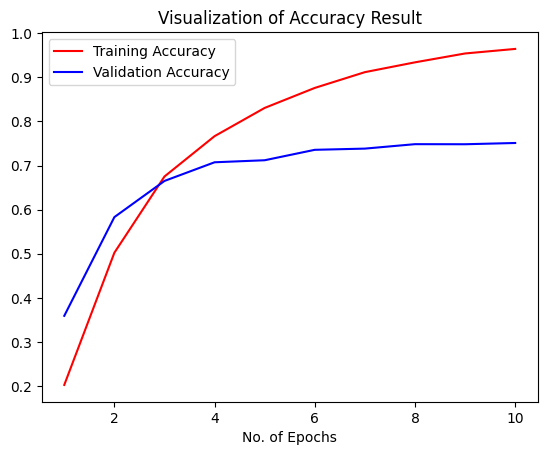

In [43]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [44]:
class_name = validation_set.class_names

In [45]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'Plant Disease dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=8,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [56]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

2197/2197 [==============================] - 81s 37ms/step


In [57]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [58]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [59]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([37, 30, 37, ..., 37, 37, 37], dtype=int64)>

In [60]:
class_name = validation_set.class_names
print(class_name)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [61]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [62]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

ValueError: Number of classes, 54, does not match size of target_names, 38. Try specifying the labels parameter

### Confusion Matrix Visualization

In [ ]:
import seaborn as sns

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

Predctive System - Testing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
   'Plant Disease dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

In [ ]:
# cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

In [ ]:
#Test Image Visualization
import cv2
import numpy as np
image_path = 'Plant Disease dataset/test/test/PotatoEarlyBlight4.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [55]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 466ms/step


In [56]:
print(predictions)

[[8.47039893e-15 3.84040359e-22 2.95708384e-19 1.33245613e-18
  7.91657810e-21 1.30930126e-14 1.13454811e-18 1.33368746e-17
  4.50314015e-17 2.66885023e-22 6.13474170e-24 4.06107751e-28
  3.94407329e-25 3.75401581e-23 4.86018159e-26 5.32785750e-18
  7.25893381e-19 3.66861736e-25 4.41787801e-17 4.86187027e-18
  1.00000000e+00 5.05030742e-16 2.72065477e-17 6.46284735e-22
  1.90013100e-21 7.65296543e-19 2.83183635e-20 7.34777430e-20
  7.59999719e-24 4.70629935e-20 1.43842024e-13 2.03046474e-20
  1.23781107e-15 1.10330541e-26 1.25230620e-23 7.54985107e-27
  1.19037100e-26 9.12675416e-19]]


In [57]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

20


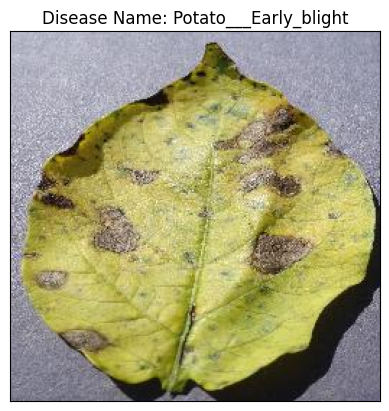

In [58]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()